# Nobel laureates for physics years 1901-2005

H0 (Null Hypothesis): There is no significant difference in the proportion of
applied physics Nobel Prizes between the early period (1901-1950) and the
recent period (1981-2025). The theoretical propensity has remained constant
over time.

HA (Alternative Hypothesis): There is a significant increase in applied physics
Nobel Prizes (decrease in theoretical propensity) in recent decades compared
to the early 20th century.

In [36]:
# Nobel Prize Physics Analysis: Theoretical vs Applied Trends
# Testing the hypothesis about shift from theoretical to applied physics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/pbarizza/nobel-prizes/refs/heads/main/data/physics.csv')

print("Dataset loaded successfully!")
print(f"Total prizes: {len(df)}")
print(f"Years: {df['Year'].min()} - {df['Year'].max()}")

Dataset loaded successfully!
Total prizes: 119
Years: 1901 - 2025


In [38]:
# Null Hypothesis Statement:
"""
H0 (Null Hypothesis): There is no significant difference in the proportion of
applied physics Nobel Prizes between the early period (1901-1950) and the
recent period (1981-2025). The theoretical propensity has remained constant
over time.

HA (Alternative Hypothesis): There is a significant increase in applied physics
Nobel Prizes (decrease in theoretical propensity) in recent decades compared
to the early 20th century.
"""

'\nH0 (Null Hypothesis): There is no significant difference in the proportion of \napplied physics Nobel Prizes between the early period (1901-1950) and the \nrecent period (1981-2025). The theoretical propensity has remained constant \nover time.\n\nHA (Alternative Hypothesis): There is a significant increase in applied physics \nNobel Prizes (decrease in theoretical propensity) in recent decades compared \nto the early 20th century.\n'

In [39]:
# Prepare the data
# Ensure we have the right columns
print("\nAvailable columns:")
print(df.columns.tolist())

# Check if we need to create Binary_Classification from Classification
if 'Binary_Classification' not in df.columns:
    # Create binary classification based on existing Classification column
    def create_binary_classification(row):
        if row['Classification'] == 'Theoretical':
            return 'Theoretical'
        else:
            return 'Applied'

    df['Binary_Classification'] = df.apply(create_binary_classification, axis=1)

# Count number of laureates per prize
df['Num_Laureates'] = df['Laureates'].apply(lambda x: len(x.split('; ')))

# Time period analysis
early_period = df[df['Year'] <= 1950]
mid_period = df[(df['Year'] > 1950) & (df['Year'] <= 1980)]
recent_period = df[df['Year'] > 1980]


Available columns:
['Year', 'Laureates', 'Motivation', 'Classification', 'Theoretical_Propensity', 'Physics_Subfield']


In [40]:
print(f"\nTime Period Analysis:")
print(f"Early period (1901-1950): {len(early_period)} prizes")
print(f"Mid period (1951-1980): {len(mid_period)} prizes")
print(f"Recent period (1981-2025): {len(recent_period)} prizes")


Time Period Analysis:
Early period (1901-1950): 44 prizes
Mid period (1951-1980): 30 prizes
Recent period (1981-2025): 45 prizes


In [41]:
# Theoretical propensity by period
early_prop = early_period['Theoretical_Propensity'].mean()
mid_prop = mid_period['Theoretical_Propensity'].mean()
recent_prop = recent_period['Theoretical_Propensity'].mean()

print(f"\nTheoretical Propensity by Period:")
print(f"Early (1901-1950): {early_prop:.1f}%")
print(f"Mid (1951-1980): {mid_prop:.1f}%")
print(f"Recent (1981-2025): {recent_prop:.1f}%")


Theoretical Propensity by Period:
Early (1901-1950): 50.7%
Mid (1951-1980): 58.2%
Recent (1981-2025): 50.1%


In [42]:
# Statistical test: Compare early vs recent periods
t_stat, p_value = stats.ttest_ind(
    early_period['Theoretical_Propensity'],
    recent_period['Theoretical_Propensity'],
    equal_var=False
)

print(f"\nStatistical Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


Statistical Test Results:
T-statistic: 0.1047
P-value: 0.9169


In [43]:
alpha = 0.05
if p_value < alpha:
    print(f"Result: REJECT null hypothesis (p < {alpha})")
    print("There is a statistically significant difference in theoretical propensity between early and recent periods.")
else:
    print(f"Result: FAIL TO REJECT null hypothesis (p >= {alpha})")
    print("No statistically significant difference found.")

Result: FAIL TO REJECT null hypothesis (p >= 0.05)
No statistically significant difference found.


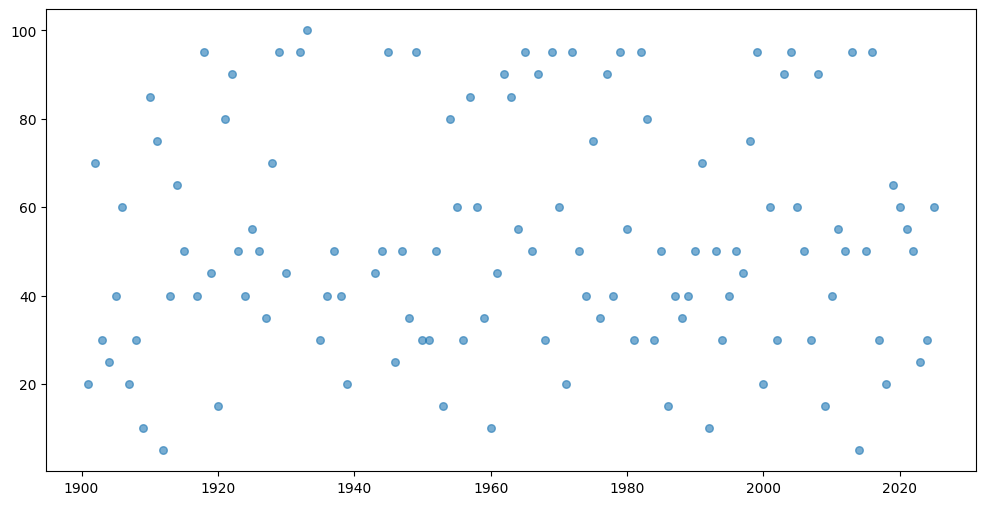

In [44]:
# Create visualizations

# 1. Theoretical propensity over time
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Theoretical_Propensity'], alpha=0.6, s=30)

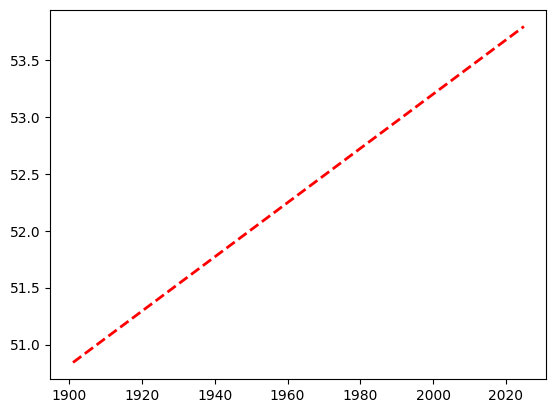

In [45]:
# Add trend line
z = np.polyfit(df['Year'], df['Theoretical_Propensity'], 1)
p = np.poly1d(z)
plt.plot(df['Year'], p(df['Year']), "r--", linewidth=2, label=f'Trend (slope={z[0]:.2f})')

Text(2000, 95, 'Recent\n(1981-2025)')

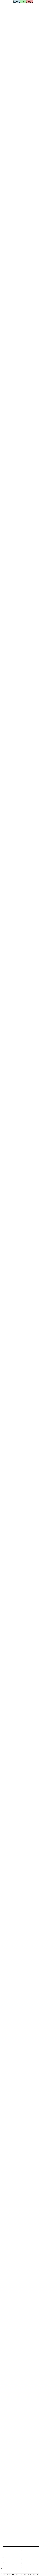

In [46]:
# Add period markers
plt.axvline(x=1950, color='gray', linestyle=':', alpha=0.7)
plt.axvline(x=1980, color='gray', linestyle=':', alpha=0.7)
plt.text(1925, 95, 'Early\n(1901-1950)', ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
plt.text(1965, 95, 'Mid\n(1951-1980)', ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
plt.text(2000, 95, 'Recent\n(1981-2025)', ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))


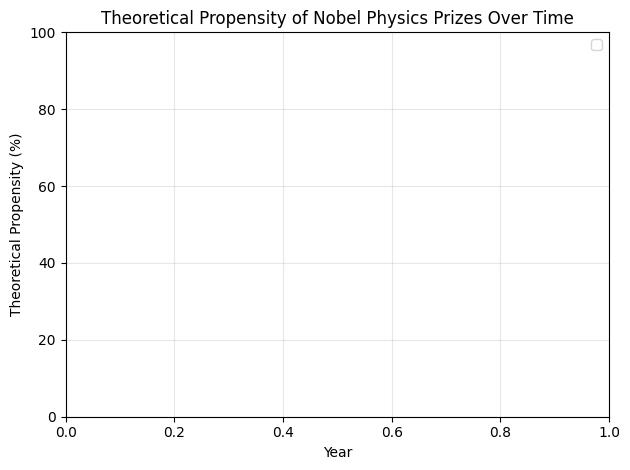

In [47]:
plt.xlabel('Year')
plt.ylabel('Theoretical Propensity (%)')
plt.title('Theoretical Propensity of Nobel Physics Prizes Over Time')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

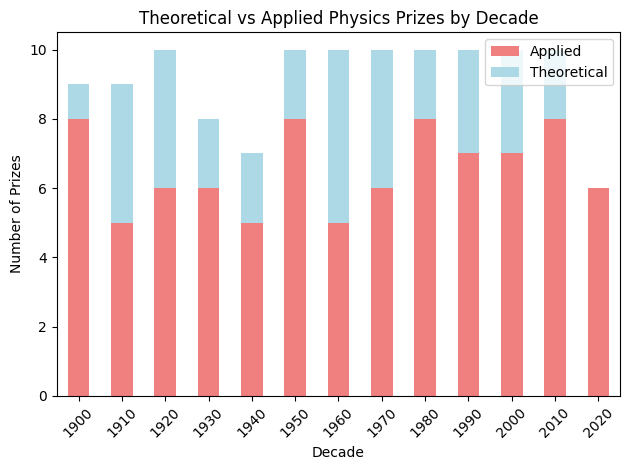

In [48]:
# 2. Binary classification over time
df['Decade'] = (df['Year'] // 10) * 10
classification_by_decade = df.groupby(['Decade', 'Binary_Classification']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
ax = classification_by_decade.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.xlabel('Decade')
plt.ylabel('Number of Prizes')
plt.title('Theoretical vs Applied Physics Prizes by Decade')
plt.legend(['Applied', 'Theoretical'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

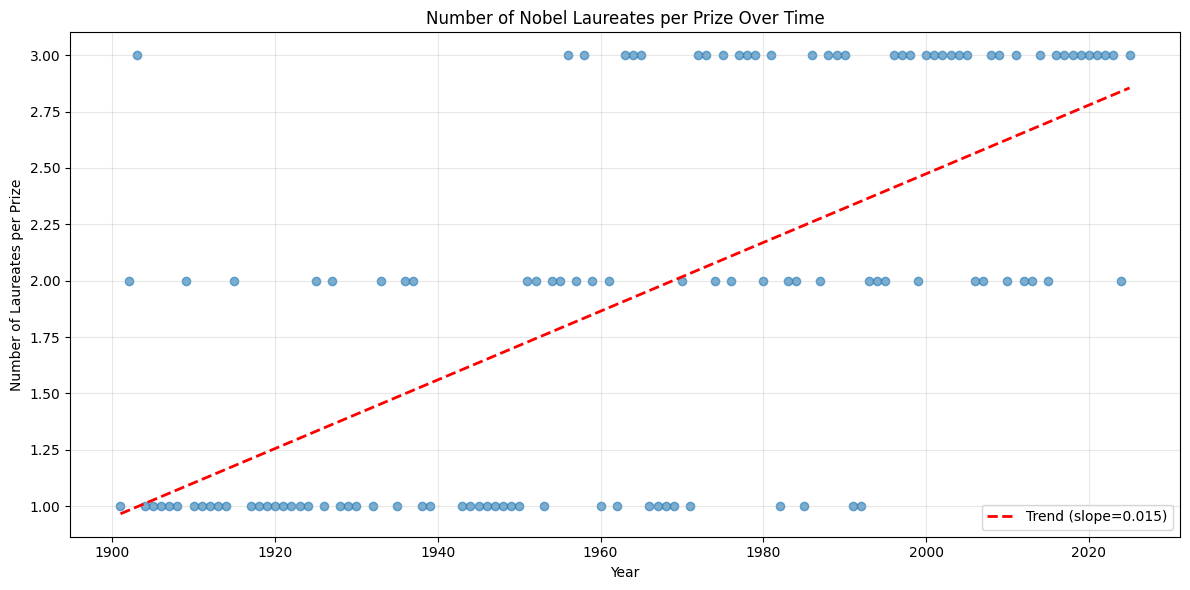

In [49]:
# 3. Number of laureates over time
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['Num_Laureates'], alpha=0.6)
z_laureates = np.polyfit(df['Year'], df['Num_Laureates'], 1)
p_laureates = np.poly1d(z_laureates)
plt.plot(df['Year'], p_laureates(df['Year']), "r--", linewidth=2, label=f'Trend (slope={z_laureates[0]:.3f})')
plt.xlabel('Year')
plt.ylabel('Number of Laureates per Prize')
plt.title('Number of Nobel Laureates per Prize Over Time')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
# 4. Subfield analysis
# Get top subfields
all_subfields = []
for subfield_list in df['Physics_Subfield']:
    subfields = subfield_list.split('; ')
    all_subfields.extend(subfields)

subfield_counts = pd.Series(all_subfields).value_counts()
top_6_subfields = subfield_counts.head(6).index.tolist()

print(f"\nTop 6 Subfields:")
for i, (subfield, count) in enumerate(subfield_counts.head(6).items(), 1):
    print(f"{i}. {subfield}: {count} prizes")



Top 6 Subfields:
1. Particle Physics: 27 prizes
2. Condensed Matter Physics: 27 prizes
3. Instrumentation & Measurement Techniques: 20 prizes
4. Atomic Physics: 20 prizes
5. Nuclear Physics: 12 prizes
6. Quantum Foundations: 10 prizes


In [51]:
# Create time series for top subfields
year_subfield_data = []
for idx, row in df.iterrows():
    year = row['Year']
    propensity = row['Theoretical_Propensity']
    subfields = row['Physics_Subfield'].split('; ')

    for subfield in subfields:
        if subfield in top_6_subfields:
            year_subfield_data.append({
                'Year': year,
                'Theoretical_Propensity': propensity,
                'Subfield': subfield
            })

subfield_df_time = pd.DataFrame(year_subfield_data)

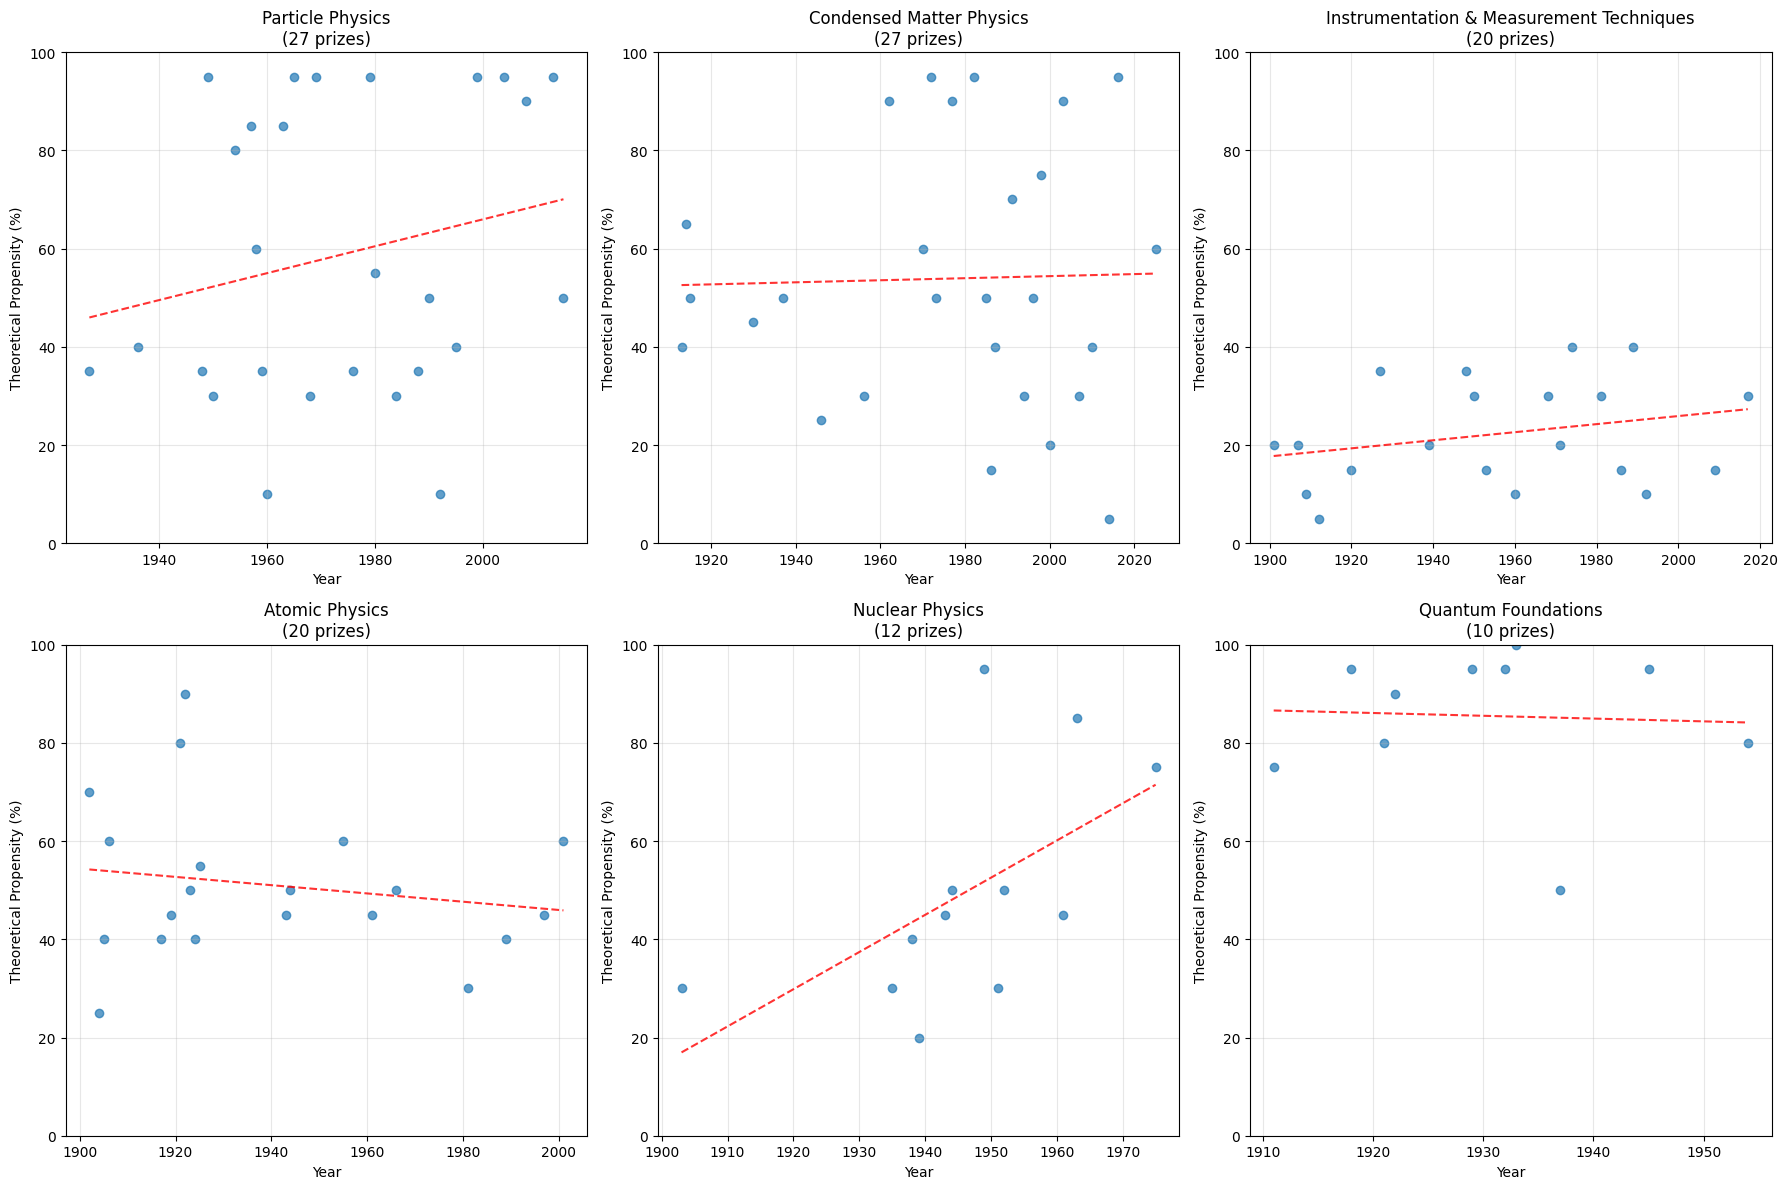

In [52]:
# Create subplot for each top subfield
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, subfield in enumerate(top_6_subfields):
    subfield_data = subfield_df_time[subfield_df_time['Subfield'] == subfield]
    if not subfield_data.empty:
        axes[i].scatter(subfield_data['Year'], subfield_data['Theoretical_Propensity'], alpha=0.7)
        # Add trend line if enough data points
        if len(subfield_data) > 2:
            z = np.polyfit(subfield_data['Year'], subfield_data['Theoretical_Propensity'], 1)
            p = np.poly1d(z)
            axes[i].plot(subfield_data['Year'], p(subfield_data['Year']), "r--", alpha=0.8)
        axes[i].set_title(f'{subfield}\n({len(subfield_data)} prizes)')
        axes[i].set_ylim(0, 100)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Theoretical Propensity (%)')
        axes[i].grid(True, alpha=0.3)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [53]:
# Final summary
print("\n" + "="*60)
print("FINAL SUMMARY AND CONCLUSION")
print("="*60)
print(f"Early period (1901-1950): {early_prop:.1f}% theoretical")
print(f"Recent period (1981-2025): {recent_prop:.1f}% theoretical")
print(f"Difference: {early_prop - recent_prop:.1f} percentage points")
print(f"P-value from t-test: {p_value:.4f}")

if p_value < 0.05:
    print("\nCONCLUSION: The null hypothesis is rejected.")
    print("There is strong evidence that Nobel Prizes in Physics have become")
    print("significantly more applied and less theoretical in recent decades")
    print("compared to the early 20th century.")
else:
    print("\nCONCLUSION: The null hypothesis cannot be rejected.")
    print("There is insufficient evidence to conclude a significant shift")
    print("from theoretical to applied physics in Nobel Prize awards.")



FINAL SUMMARY AND CONCLUSION
Early period (1901-1950): 50.7% theoretical
Recent period (1981-2025): 50.1% theoretical
Difference: 0.6 percentage points
P-value from t-test: 0.9169

CONCLUSION: The null hypothesis cannot be rejected.
There is insufficient evidence to conclude a significant shift
from theoretical to applied physics in Nobel Prize awards.


In [54]:
print(f"\nAdditional observations:")
print(f"- Average laureates per prize (early): {early_period['Num_Laureates'].mean():.2f}")
print(f"- Average laureates per prize (recent): {recent_period['Num_Laureates'].mean():.2f}")
print(f"- Most common recent subfield: {subfield_counts.index[0]} ({subfield_counts.iloc[0]} prizes)")


Additional observations:
- Average laureates per prize (early): 1.23
- Average laureates per prize (recent): 2.51
- Most common recent subfield: Particle Physics (27 prizes)
